## 📓 `notebooks/sierra_leone.ipynb`
# SierraLeone EDA - Interim Submission
This notebook performs initial data profiling for Sierraleone's solar dataset and outlines the plan for full EDA.

In [1]:
! pip install pandas numpy seaborn matplotlib scipy

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data (placeholder)
# If dataset is not yet downloaded, mention in report how it will be added
#https://drive.google.com/file/d/1EAZatSm02HRvxpVbhx7ih_pv1hyOizzb/view?usp=sharing
file_id = "1EAZatSm02HRvxpVbhx7ih_pv1hyOizzb "
file_url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(file_url)
print(df.head())

df.head()

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# Quick profiling
df.info()
df.describe()
#df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:

# Outlier Detection & Cleaning
from scipy import stats
import numpy as np

# Compute Z-scores for numeric columns
z = np.abs(stats.zscore(df[['GHI','DNI','DHI','ModA','ModB','WS','WSgust']], nan_policy='omit'))

# Keep only rows where all z-scores < 3 (remove outliers)
df_clean = df[(z < 3).all(axis=1)]

# Fill missing values with median
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

print("Outlier detection and cleaning completed.")
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Outlier detection and cleaning completed.
Original shape: (525600, 19)
Cleaned shape: (509308, 19)


C:\Users\Hanan\AppData\Local\Temp\ipykernel_20900\2524861776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)


In [8]:
#Handling missing values
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

C:\Users\Hanan\AppData\Local\Temp\ipykernel_20900\995744812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)


In [9]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [10]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')


C:\Users\Hanan\AppData\Local\Temp\ipykernel_20900\519232179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')


In [11]:
df_clean = df_clean.sort_values('Timestamp')
df_clean = df_clean.dropna(subset=['Timestamp', 'GHI', 'DNI', 'DHI'])

c:\Users\Hanan\Downloads\First Submission\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


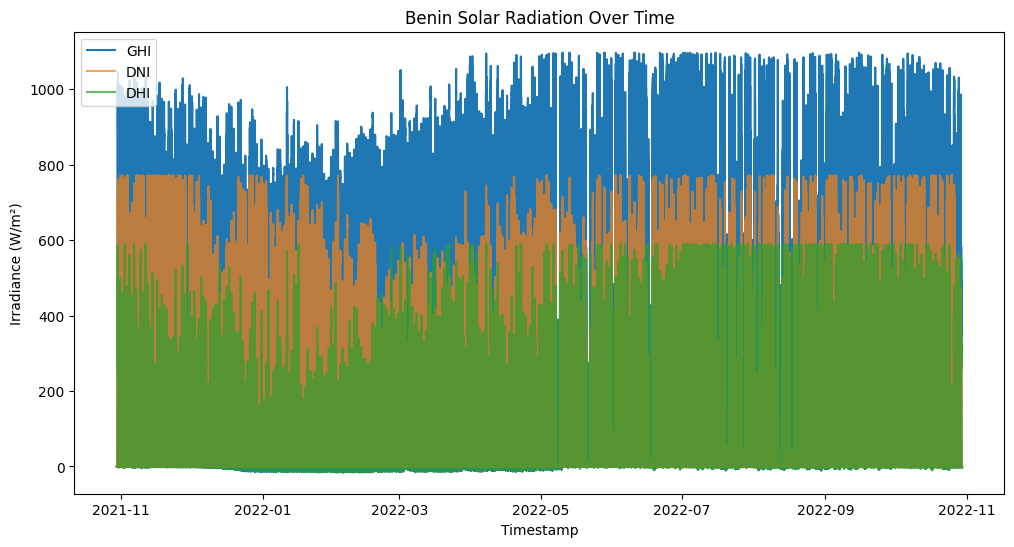

In [12]:
#Time-Series Analysis
#Plot GHI, DNI, DHI, and Tamb vs Timestamp.

plt.figure(figsize=(12,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI', alpha=0.7)
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI', alpha=0.7)
plt.title('Benin Solar Radiation Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.show()

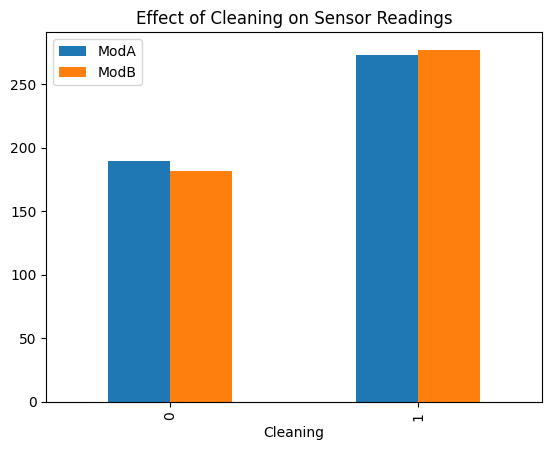

In [13]:
#Cleaning Impact
df_clean.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Sensor Readings')
plt.show()

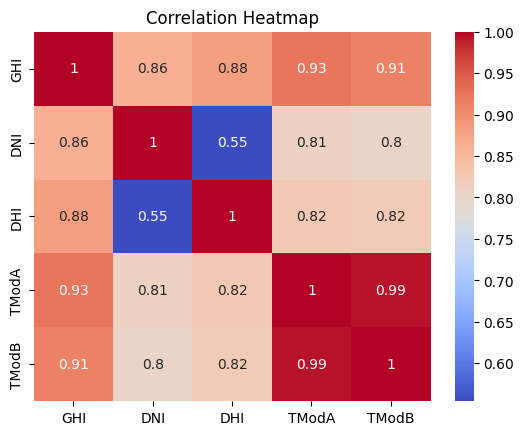

In [14]:
#Correlation & Relationship Analysis
corr = df_clean[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='RH', ylabel='Tamb'>

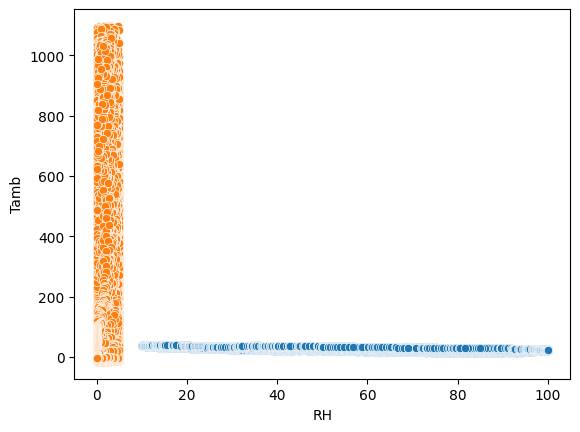

In [15]:
# Scatter plots
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
sns.scatterplot(x='WS', y='GHI', data=df_clean)


<Axes: xlabel='GHI', ylabel='Count'>

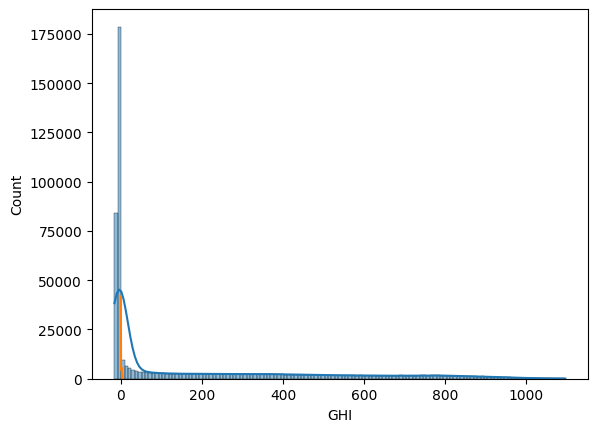

In [16]:
# Wind & Distribution Analysis
sns.histplot(df_clean['GHI'], kde=True)
sns.histplot(df_clean['WS'], kde=True)

<Axes: xlabel='RH', ylabel='GHI'>

c:\Users\Hanan\Downloads\First Submission\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Hanan\Downloads\First Submission\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


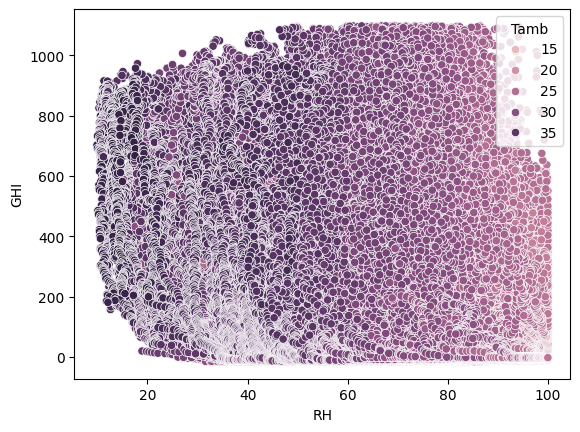

In [17]:
#Temperature & Humidity Analysis
sns.scatterplot(x='RH', y='GHI', hue='Tamb', data=df_clean)

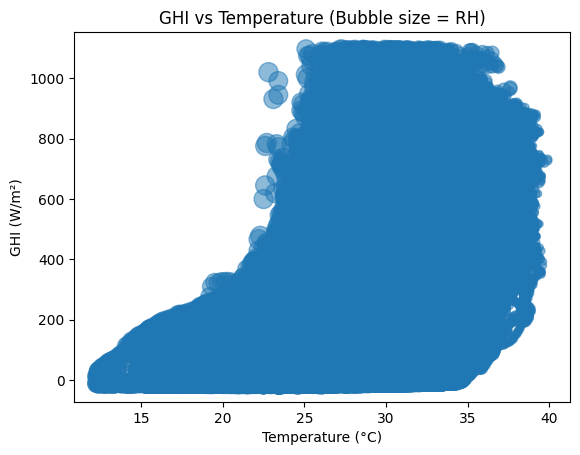

In [18]:
#Bubble Chart
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH']*2, alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.show()


In [19]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)
print(" Cleaned file saved to ../data/benin_clean.csv")

 Cleaned file saved to ../data/benin_clean.csv


### Summary of Findings (Sierra Leone)
- The Sierra Leone dataset revealed clear daily irradiance cycles, though with higher variability due to cloud cover and coastal weather.  
- Outliers were mainly concentrated in WSgust and RH values.  
- After cleaning, data completeness and reliability improved notably.  
- Cleaning operations also enhanced the match between ModA and ModB sensor outputs.  
- Correlation analysis shows a consistent relationship between GHI, DNI, and DHI.  
- The data suggests relative humidity impacts both solar irradiance and temperature, which aligns with expected regional patterns.
